In [1]:
import cv2
from useful import *
from shape_classes import *
import bisect
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from fourier import *

In [57]:
layout_name = "3.png"  
layout_path = os.path.join( os.getcwd(), 'images', layout_name)


layout_image = Image.open(layout_path)
image_array = np.array(layout_image)
img = image_array[:,:,0]
# plt.imshow(img)
# plt.show()
img_bin = my_preprocessing(img)
blobs_layout = connected_components(img_bin)

for blob in blobs_layout:
    blob_img = blob.image
    contour, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    gx,gy = sample_polygon_uniformly(contour[0],50)
    contour_sampled = np.column_stack((gx, gy)).astype(np.int32)
    f_descriptors_layout = fourier_descriptors(contour_sampled, 50)

layout_name = "4.png"  
layout_path = os.path.join( os.getcwd(), 'images', layout_name)


layout_image = Image.open(layout_path)
image_array = np.array(layout_image)
img = image_array[:,:,0]
# plt.imshow(img)
# plt.show()
img_bin = my_preprocessing(img)
blobs_layout = connected_components(img_bin)

for blob in blobs_layout:
    blob_img = blob.image
    contour, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    gx,gy = sample_polygon_uniformly(contour[0],50)
    contour_sampled = np.column_stack((gx, gy)).astype(np.int32)
    f_descriptors_SEM = fourier_descriptors(contour_sampled, 50)

# diff = np.abs(f_descriptors_layout - f_descriptors_SEM)
diff = np.abs(np.abs(f_descriptors_layout) - np.abs(f_descriptors_SEM))
similarity = np.mean(diff)
    
print(similarity)

510.8009818647898


In [58]:
f_descriptors_layout[0] = 0
f_descriptors_SEM[0] = 0

f_descriptors_layout_normalized = f_descriptors_layout/ np.sqrt( np.sum( (np.abs(f_descriptors_layout))**2) )
f_descriptors_SEM_normalized = f_descriptors_SEM/ np.sqrt( np.sum( (np.abs(f_descriptors_SEM))**2) )

diff = np.abs(np.abs(f_descriptors_layout_normalized) - np.abs(f_descriptors_SEM_normalized))
similarity = np.mean(diff)
    
print(similarity)

0.0017980385072729587


In [249]:


layout_name = "3.png"  
layout_path = os.path.join( os.getcwd(), 'images', layout_name)


layout_image = Image.open(layout_path)
image_array = np.array(layout_image)
img = image_array[:,:,0]
# plt.imshow(img)
# plt.show()
img_bin = my_preprocessing(img)
blobs_layout = connected_components(img_bin)

for blob in blobs_layout:
    blob_img = blob.image
    contour, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    gx,gy = sample_polygon_uniformly(contour[0],50)
    contour_sampled = np.column_stack((gx, gy)).astype(np.int32)
    f_descriptors_layout = fourier_descriptors(contour_sampled, 50)

layout_name = "4.png"  
layout_path = os.path.join( os.getcwd(), 'images', layout_name)


layout_image = Image.open(layout_path)
image_array = np.array(layout_image)
img = image_array[:,:,0]
# plt.imshow(img)
# plt.show()
img_bin = my_preprocessing(img)
blobs_layout = connected_components(img_bin)

for blob in blobs_layout:
    blob_img = blob.image
    contour, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    gx,gy = sample_polygon_uniformly(contour[0],50)
    gx,gy = swap(gx,gy, 30)
    contour_sampled = np.column_stack((gx, gy)).astype(np.int32)
    # print(np.size(contour_sampled))
    f_descriptors_SEM = fourier_descriptors(contour_sampled, 50)

# score = []
# for j in range(0,49):
#     for blob in blobs_layout:
#         blob_img = blob.image
#         contour, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#         gx,gy = sample_polygon_uniformly(contour[0],50)
#         gx,gy = swap(gx,gy, j)
#         contour_sampled = np.column_stack((gx, gy)).astype(np.int32)
#         # print(np.size(contour_sampled))
#         f_descriptors_SEM = fourier_descriptors(contour_sampled, 50)
#         fl = f_descriptors_layout/ np.sqrt( np.sum( (np.abs(f_descriptors_layout))**2) )
#         fs = f_descriptors_SEM/ np.sqrt( np.sum( (np.abs(f_descriptors_SEM))**2) )
#         score.append(complex_l2(fl, fs)  )
        
# diff = np.abs(f_descriptors_layout - f_descriptors_SEM)
# diff = np.abs(f_descriptors_layout - f_descriptors_SEM)
# similarity = np.mean(diff)
    
# print(complex_l2(f_descriptors_layout,f_descriptors_SEM))

[0.0791171861997035, 0.10731265042253656, 0.15362824288485272, 0.20418146887016272, 0.2545638122617039, 0.30306573168612844, 0.34955674121617375, 0.3941658140434098, 0.43724827379283204, 0.47921331128879935, 0.5202753536955154, 0.5602968389290274, 0.5988779336548772, 0.6355913267252434, 0.6699275690415734, 0.7016152105164943, 0.7305018010195392, 0.7563723850310787, 0.779282331462289, 0.799256053190178, 0.8162938359372142, 0.8302967052604396, 0.8412171685192678, 0.8488852403686835, 0.8532489444691758, 0.8543263335936013, 0.8520773006835385, 0.846508728481363, 0.8376483924982727, 0.8256415982605484, 0.8105781758712647, 0.7925796284225609, 0.7716237510018474, 0.7476602394412766, 0.7206980573249817, 0.6907424369342113, 0.6579834242810887, 0.622547155911151, 0.5847881953743614, 0.545314662967272, 0.5045768356091399, 0.46293160831951663, 0.42048174614025635, 0.3771077792813629, 0.33231212004853966, 0.28567748798085807, 0.2372102047442206, 0.18716446190856698, 0.13784420430134853]


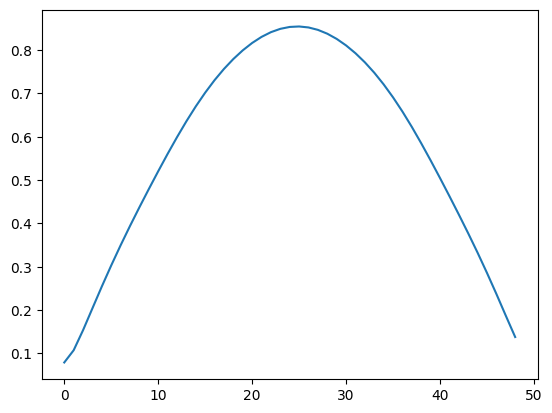

In [229]:
print(score)
plt.plot(score)

In [250]:
f_descriptors_layout[0] = 0
f_descriptors_SEM[0] = 0

fl = f_descriptors_layout/ np.sqrt( np.sum( (np.abs(f_descriptors_layout))**2) )
fs = f_descriptors_SEM/ np.sqrt( np.sum( (np.abs(f_descriptors_SEM))**2) )

# diff = np.abs(f_descriptors_layout_normalized - f_descriptors_SEM_normalized)
# diff = f_descriptors_layout_normalized - f_descriptors_SEM_normalized
# similarity = np.mean(diff)
    
print(complex_l2(fl, fs) )

1.8840524180692386


In [255]:
fl1, fl2 = makeShiftInvariant(fl)
fs1, fs2 = makeShiftInvariant(fs)

print(complex_l2(fl1, fs1) )
print(complex_l2(fl1, fs2) )
print(complex_l2(fl2, fs1) )
print(complex_l2(fl2, fs2) )

1.8757293238126773
1.8588393620874373
1.8596415028416604
1.8757293238126773


In [117]:
print(len(fl))
l = len(fl)
pos = fl[:l//2]
neg = fl[l//2+1:]

print(np.abs(pos))
print(np.abs(neg))

20
[0.         0.20609122 0.03646726 0.0575766  0.03210743 0.01588394
 0.01304702 0.00559996 0.00536902 0.00487839]
[0.01351017 0.00489607 0.00505883 0.02627837 0.06941132 0.06623882
 0.04263627 0.07212538 0.96645551]


In [149]:
for m in range(1,4):
    print(m)

1
2
3


In [184]:


# def fp(phi, G):
#     G = np.array(G)  # Ensure G is a numpy array
#     total = 0
#     mp = len(G)
#     for m in range(mp):
#         Gm = G[(-m) % mp] * np.exp(-m * 1j * phi)
#         Gp = G[(m) % mp] * np.exp(m * 1j * phi)
#         total += Gp.real * Gm.imag - Gp.imag * Gm.real
#     return -total  # Negate the function for maximization

G = fl

x = getStartingPhase(G)
print(x)


1.0


In [254]:
import numpy as np
from scipy.optimize import minimize_scalar

def swap(a,b,x):
    temp = a[:x]

    a = np.concatenate((a[x:], temp))

    temp = b[:x]
    b = np.concatenate( (b[x:], temp))

    return a,b

def complex_l2(f1,f2):
    a = f1 -f2
    return np.sqrt(np.sum((a.real)**2 + (a.imag)**2))

# def getStartPointPhase:
#     pass
# def getStartingPhase(G):
#     result = minimize_scalar(fp, bounds=(0, np.pi), args=(G,))
#     max_phi = result.x
#     return result.x

def getStartingPhase(G):

    cmax = -np.inf
    phimax = 0
    K = 10000

    for k in range(0,K):
        phi = np.pi*k//K
        c = fp( phi, G)
        if c > cmax:
            cmax = c
            phimax = phi
    return phimax
    # result = minimize_scalar(fp, bounds=(0, np.pi), args=(G,))
    # max_phi = result.x
    # return result.x
    
def fp(phi, G):
    G = np.array(G)  # Ensure G is a numpy array
    total = 0
    mp = int((len(G)-1)/2)
    for m in range(1, mp +1):
        Gm = G[ m%mp ] * np.exp(-m * 1j * phi)
        Gp = G[ (-m)%mp ] * np.exp(m * 1j * phi)
        # print((-m) % mp)
        # print((m) % mp)
        total = total + Gp.real * Gm.imag - Gp.imag * Gm.real
    return -total  # Negate the function for maximization

# def
# public int getCoefficientIndex(int m) {
# 		return mod(m, G.length);
# 	}

def shiftStartingPointPhase(G, phi):
    mp = int((len(G)-1)/2)
    Gnew = G
    for m in range(-mp, mp+1):
        if m != 0:
            Gnew[(m) % mp] = G[(m) % mp] * np.exp(m * 1j * phi)
    return -Gnew

def makeShiftInvariant(G):
    phi = getStartingPhase(G)
    GA = shiftStartingPointPhase(G, phi)
    GB = shiftStartingPointPhase(G, phi+np.pi)

    return GA, GB

def getIndex(m, mp):
    return m%mp

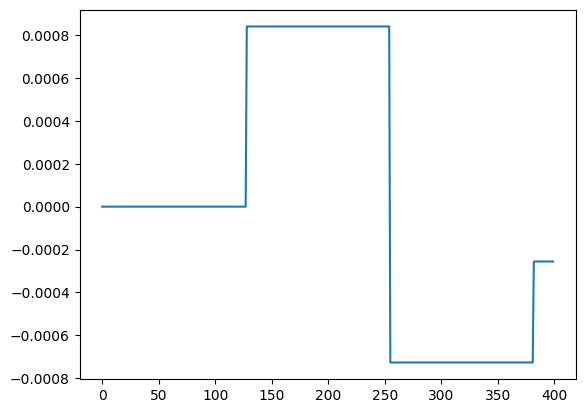

In [257]:
K = 400

sum = []
for k in range(0,K):
    phi = np.pi*k//K
    c = fp( phi, fl)
    sum.append(c)

plt.plot(sum)

In [ ]:
layout_name = "2.png"  
layout_path = os.path.join( os.getcwd(), 'images', layout_name)


layout_image = Image.open(layout_path)
image_array = np.array(layout_image)
img = my_preprocessing(image_array[:,:,0])
print(sum(sum(img)))
print(type(img))

In [ ]:
import cv2
from useful import *
from shape_classes import *
import bisect
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from fourier import *

layout_name = "36.png"  
path = os.path.join( os.getcwd(), 'images', layout_name)

adaptive_window = Adaptive_window(path, 500)

start_row, end_row, _ = adaptive_window.get_window_rows()
# start_row, end_row = (0, 210)
start_col = 0
end_col = start_col + 500
image = Image.open(path)
print(image.size)
img = np.array( image.crop(( start_col, start_row, end_col, end_row )) ) [:,:,0]
img_bin = my_preprocessing(img)
plt.imshow(img_bin)
plt.show()

start_row, end_row, _ = adaptive_window.get_window_rows()
# start_row, end_row = (0, 210)
start_col = 0
end_col = start_col + 500
image = Image.open(path)
print(image.size)
img = np.array( image.crop(( start_col, start_row, end_col, end_row )) ) [:,:,0]
img_bin = my_preprocessing(img)
plt.imshow(img_bin)
plt.show()

start_row, end_row, _ = adaptive_window.get_window_rows()
# start_row, end_row = (0, 210)
start_col = 0
end_col = start_col + 500
image = Image.open(path)
print(image.size)
img = np.array( image.crop(( start_col, start_row, end_col, end_row )) ) [:,:,0]
img_bin = my_preprocessing(img)
plt.imshow(img_bin)
plt.show()

start_row, end_row, _ = adaptive_window.get_window_rows()
# start_row, end_row = (0, 210)
start_col = 0
end_col = start_col + 500
image = Image.open(path)
print(image.size)
img = np.array( image.crop(( start_col, start_row, end_col, end_row )) ) [:,:,0]
img_bin = my_preprocessing(img)
plt.imshow(img_bin)
plt.show()

In [4]:
import PIL

class Adaptive_window:
    def __init__(self, path, win_col_length):
        self.image = Image.open(path)
        _, self.im_row_length  = self.image.size
        self.horizontal_hop = 200
        self.th = 50
        self.start_row = 0
        self.end_row = self.start_row + self.horizontal_hop
        self.start_col = 0
        self.end_col = self.start_col + win_col_length
        self.is_this_last_rows = False
        self.first_rows_done =  False
        self.cell_width = 0
    
    def get_window_rows(self):

        if self.first_rows_done:
            self.end_row = self.start_row + self.cell_width
        else:
            self.end_row = self.start_row + self.horizontal_hop
            
        if self.end_row >= self.im_row_length:
            self.end_row = self.im_row_length
            self.is_this_last_rows = True
            return self.start_row, self.end_row, self.is_this_last_rows
            
        while True:
            window_bin = my_preprocessing( np.array( self.image.crop(( self.start_col, self.start_row, self.end_col, self.end_row )) )[:,:,0] )

            if sum( window_bin[self.end_row - self.start_row -1,:] ) == 0:
                window_found = True
                break
            else:                
                self.end_row = self.end_row + 1
                if self.end_row >= self.im_row_length:
                    self.end_row = self.im_row_length
                    self.is_this_last_rows = True
                    break
        
        temp_start_row = self.start_row
        temp_end_row = self.end_row

        # store for later iterations
        self.start_row = self.end_row + 1                            
        # self.end_row = self.start_row + temp_end_row - temp_start_row
        
        if not self.first_rows_done:
            self.first_rows_done = True
            self.cell_width = temp_end_row - temp_start_row
            
        return temp_start_row, temp_end_row, self.is_this_last_rows

    def get_windows_rows_binary(self):
        
        if self.first_rows_done:
            self.end_row = self.start_row + self.cell_width
            low = self.end_row -  self.cell_width//2
            high = self.end_row -  self.cell_width//2
        else:
            self.end_row = self.start_row + self.horizontal_hop
            low = self.end_row -  self.horizontal_hop//2
            high = self.end_row -  self.horizontal_hop//2
            
        if self.end_row >= self.im_row_length:
            self.end_row = self.im_row_length
            self.is_this_last_rows = True
            return self.start_row, self.end_row, self.is_this_last_rows

        
        while low <= high:
            mid = int((low + high)//2)
            
        
        
# plt.imshow(img)
# # plt.show()
# img_bin = my_preprocessing(img)
        

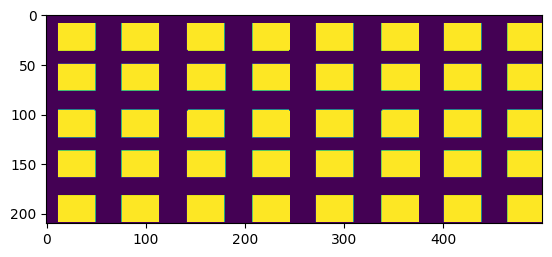

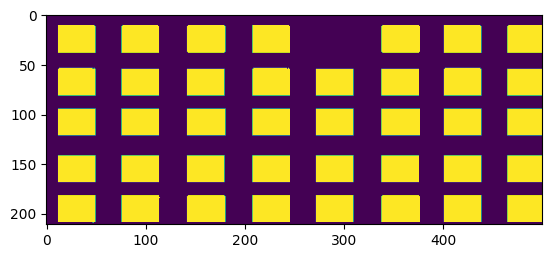

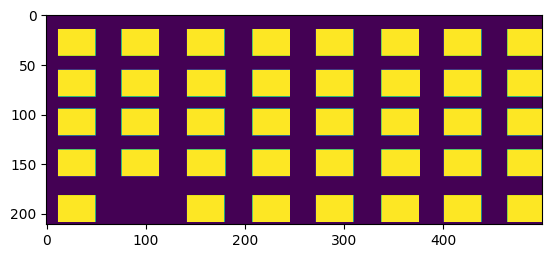

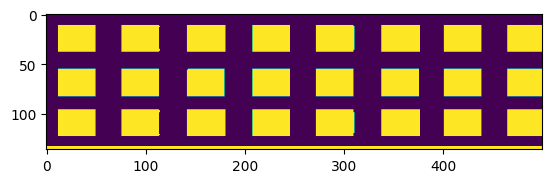

In [7]:
layout_name = "37.png"  
path = os.path.join( os.getcwd(), 'images', layout_name)

adaptive_window = Adaptive_window(path, 500)
image = Image.open(path)

while True:
    start_row, end_row, flag = adaptive_window.get_window_rows()
    start_col = 0
    end_col = start_col + 500
    img = np.array( image.crop(( start_col, start_row, end_col, end_row )) ) [:,:,0]
    img_bin = my_preprocessing(img)
    plt.imshow(img_bin)
    plt.show()
    
    if flag:
        break